In [1]:
#Machine learning HW
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
import seaborn as sns
import statistics
import math
import sklearn.linear_model as sk
import sklearn.metrics as metrics
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import confusion_matrix
import matplotlib

In [2]:
#Reading the data
rundata = pd.read_csv("sgemm_product.csv")
rundata.head(10)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81
5,16,16,16,8,8,8,8,2,1,1,0,1,0,1,81.10,82.41,87.01,82.14
6,16,16,16,8,8,8,8,2,1,1,0,1,1,0,83.31,82.86,88.60,82.97
7,16,16,16,8,8,8,8,2,1,1,0,1,1,1,93.13,94.30,96.19,94.43
8,16,16,16,8,8,8,8,2,1,1,1,0,0,0,117.38,116.95,124.15,117.83
9,16,16,16,8,8,8,8,2,1,1,1,0,0,1,85.76,85.30,86.96,87.19


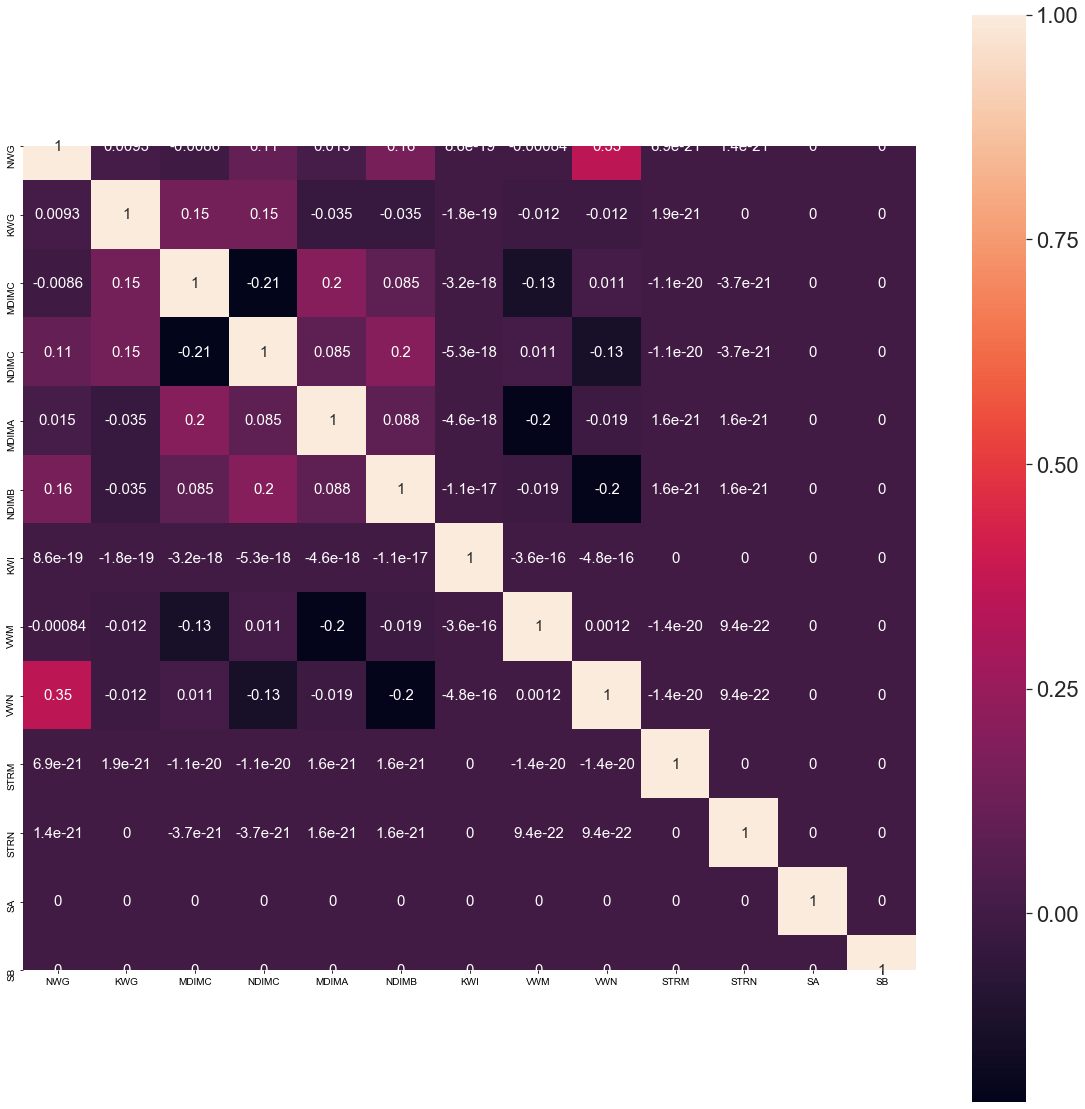

In [5]:
rundataa =rundata.iloc[:,1:14]
fig = plt.subplots(figsize = (20,20))
sns.set(font_scale=2.0)
sns.heatmap(rundataa.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 15})
plt.show()

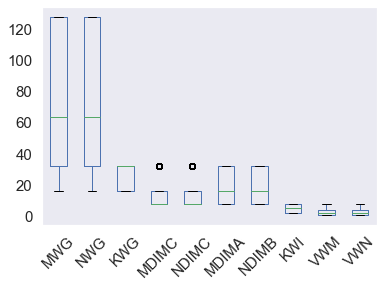

In [6]:
    rundatab1 =rundata.iloc[:,0:10]
    boxplot1 = rundatab1.boxplot(grid=False, rot=45, fontsize=15)

In [14]:
#Normalizing the data
def norm(dataset):
    scaler = StandardScaler()
    newdata =scaler.fit_transform(dataset)
    return newdata

In [15]:
rundata_n=rundata

In [16]:
#Creating a matrix of all the independent variables
xd = np.array(rundata_n)
x=xd[:,0:14]
x.shape
x=pd.DataFrame(x)
test=pd.DataFrame(x)
x["constant"]=1
x=np.array(x)
x.shape

(241600, 15)

In [17]:
#Generating a random matrix
def theta_generate(x):
    theta = np.random.rand(x.shape[1],1)
    return theta[0:,]

In [18]:
theta = theta_generate(x)

In [19]:
#Creating a column which is the average of all the four runtimes
rundata["runavg (ms)"] = (rundata["Run1 (ms)"]+rundata["Run2 (ms)"]+rundata["Run3 (ms)"]+rundata["Run4 (ms)"])/4
rundata.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),runavg (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


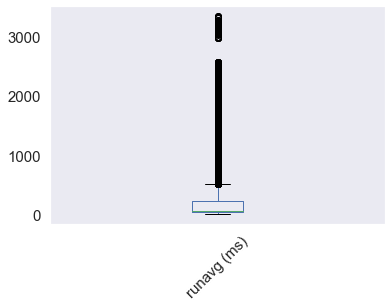

In [16]:
rundatab2 =rundata.iloc[:,18:19]
box = rundatab2.boxplot(grid=False, rot=45, fontsize=15)

In [20]:
#Value to be predicted is run, keeping it in a matrix
runs = rundata["runavg (ms)"]/1000
run=np.array(runs).reshape([-1,1])
run.shape

(241600, 1)

# Gradient descent and cost function for linear regression


In [21]:
#Spliting the data into train and test
X_train, X_test, y_train, y_test=train_test_split(x, run, train_size=0.70,test_size=0.30, random_state=100)

In [22]:
theta = theta_generate(X_train)

In [23]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = norm(X_train)
X_test = norm(X_test)
y_train = norm(y_train)
y_test = norm(y_test)

In [15]:
#Setting up the Cost function
#Here x is the independent variable, y is the dependent variable and theta is the randomly generated numbers

def Cost_fun(x,y,theta):
    m=len(rundata.axes[0])
    the1 = np.matmul(x,theta)
    Cost1=sum(np.subtract((the1),y)**2)
    Cost_fun=Cost1/(2*m)
    return(Cost_fun)  

In [16]:
#Implementing gradient Descent function
def gradesc_fun(x,y,theta,alpha,total):
    m=len(rundata.axes[0])
    xt = x.transpose()
    j=[0]*total
    for i in range(total):
        the2 =np.subtract((np.matmul(x,theta)),y)       
        the3=np.matmul(x.transpose(),the2)
        theta = np.subtract(theta , alpha*(1/m)*the3)
        theta0=theta[-1]
        j[i] = Cost_fun(x,y,theta)
    finalj=(theta, j)
    return(finalj)

In [17]:
alpha = .001 
total =3000
finalj = gradesc_fun(X_train, y_train, theta, alpha, total)

In [18]:
theta=finalj[0]
cost=finalj[1]


In [19]:
cost[2999]

array([0.24875792])

Text(0, 0.5, 'Cost')

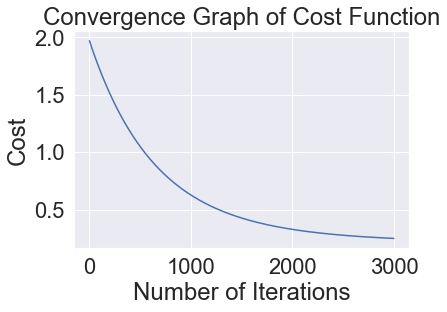

In [20]:
plt.plot(cost)
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")

In [21]:
#Linear Reg inbuilt func output
pred = sm.OLS(y_train, X_train)
pred2 = pred.fit()
print(pred2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.407
Model:                            OLS   Adj. R-squared (uncentered):              0.407
Method:                 Least Squares   F-statistic:                              8287.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):                        0.00
Time:                        11:22:14   Log-Likelihood:                     -1.9580e+05
No. Observations:              169120   AIC:                                  3.916e+05
Df Residuals:                  169106   BIC:                                  3.918e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [22]:
#Predicting run time values using theta from gradient descent function
def pred(X_test, theta):
    predicted_val = X_test.dot(theta);
    return predicted_val;

In [23]:
ypred=pred(X_test,theta)

In [24]:
#RMSE calculated using inbuilt function and inbuilt values of reg
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = y_pred-y_test
math.sqrt(sum(error*error)/len(error))

0.7688947566917249

In [25]:
#Finding all the regression metrics
def regression_results(y_test, ypred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, ypred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, ypred) 
    mse=metrics.mean_squared_error(y_test, ypred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_test, ypred)
    median_absolute_error=metrics.median_absolute_error(y_test, ypred)
    r2=metrics.r2_score(y_test, ypred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [26]:
regression_results(y_test, ypred)

explained_variance:  0.2881
r2:  0.2881
MAE:  0.5341
MSE:  0.7119
RMSE:  0.8437


In [27]:
x2 = np.matmul(X_train,theta)
regression_results(y_train, x2)

explained_variance:  0.2893
r2:  0.2893
MAE:  0.5338
MSE:  0.7107
RMSE:  0.8431


In [28]:
alpha = .001 
total =5000
finaljs = gradesc_fun(X_train, y_train, theta, alpha, total)

In [29]:
thetas=finaljs[0]
costs=finaljs[1]

Text(0, 0.5, 'Cost')

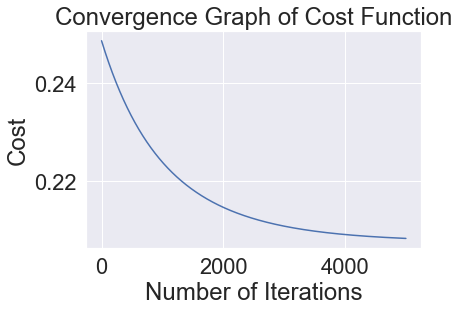

In [30]:
plt.plot(costs)
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")

In [31]:
costs[4999]

array([0.20830245])

# Gradient Descent and Cost function for Logistic Regression

In [24]:
runlog=pd.DataFrame(runs)
med_run=statistics.median(runs)
med_run

0.06979

In [25]:
import statistics
runlog["runavg_class"] = np.where(runlog['runavg (ms)']>med_run, 1, 0)
runlog1=runlog.iloc[:,1]
runlog1=np.array(runlog1)
runlog1=runlog1.reshape([-1,1])

In [26]:
#Splitting the datset, into train and test
X_train_l, X_test_l, y_train_l, y_test_l=train_test_split(x, runlog1, train_size=0.70,test_size=0.30, random_state=100)

In [27]:
#Normalising Data
X_train_l=norm(X_train_l)
X_test_l=norm(X_test_l)

In [28]:
#Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [29]:
#cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [30]:
#Gradient descent
def gradient_descent(X, y, params, alpha, total):
    m = len(y)
    cost_history = np.zeros((total,1))

    for i in range(total):
        params = params - (alpha/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [31]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

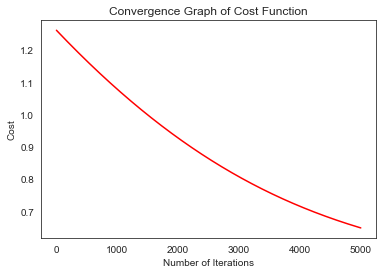

In [32]:
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 5000
learning_rate = 0.001

initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history, params_optimal) = gradient_descent(X_train_l, y_train_l, params, learning_rate, total)
y_pred = predict(X_test_l, params_optimal)

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [34]:
from sklearn.svm import SVC
from sklearn import svm, metrics

In [37]:
modelnew = svm.SVC(kernel = 'linear', C = 0.001)
modelnew.fit(X_train_l, y_train_l)

C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
y_pred = modelnew.predict(X_test_l)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [39]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix( y_test_l,y_pred)
cm_test

array([[31441,  4765],
       [ 7281, 28993]], dtype=int64)

In [40]:
y_pred_train = modelnew.predict(X_train_l)
cm_train = confusion_matrix( y_train_l,y_pred_train)
cm_train

array([[73079, 11516],
       [17089, 67436]], dtype=int64)

In [41]:
print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for svm = 0.8308597445600757
Accuracy for test set for svm = 0.8338024282560706


In [41]:
cost_history[4999]

array([0.63704634])

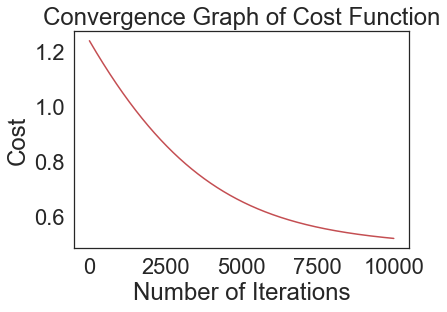

In [42]:
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 10000
learning_rate = 0.001

initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history_1, params_optimal_1) = gradient_descent(X_train_l, y_train_l, params, learning_rate, total)
y_pred = predict(X_test_l, params_optimal)

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history_1)), cost_history_1, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [43]:
cost_history_1[9999]

array([0.52293505])

# Experiment 1 

# Linear

In [44]:
X_train, X_test, y_train, y_test=train_test_split(x, run, train_size=0.70,test_size=0.30, random_state=100)

In [45]:
theta = theta_generate(X_train)

In [46]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = norm(X_train)
X_test = norm(X_test)
y_train = norm(y_train)
y_test = norm(y_test)

In [47]:
alpha = .001 
total = 3000
finalj1 = gradesc_fun(X_train, y_train, theta, alpha, total)

In [48]:
theta1=finalj1[0]
cost1=finalj1[1]

Text(0, 0.5, 'Cost')

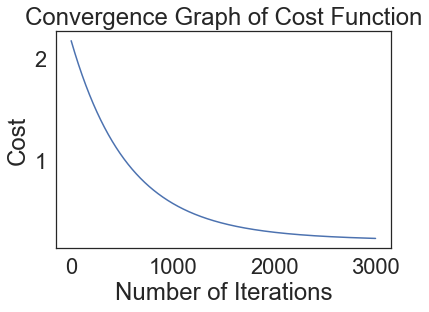

In [49]:
plt.plot(cost1)
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")

In [142]:
cost1[2999]

array([0.23438553])

In [51]:
pred = sm.OLS(y_train, X_train)
pred1 = pred.fit()
print(pred1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.407
Model:                            OLS   Adj. R-squared (uncentered):              0.407
Method:                 Least Squares   F-statistic:                              8287.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):                        0.00
Time:                        11:45:18   Log-Likelihood:                     -1.9580e+05
No. Observations:              169120   AIC:                                  3.916e+05
Df Residuals:                  169106   BIC:                                  3.918e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [52]:
def pred(X_test, theta):
    predicted_val = X_test.dot(theta);
    return predicted_val;

In [53]:
#Calculating all parameters
ypred2=pred(X_test,theta1)
regression_results(y_test, ypred2)

explained_variance:  0.3296
r2:  0.3296
MAE:  0.5099
MSE:  0.6704
RMSE:  0.8188


In [54]:
ypred_train = np.matmul(X_train,theta1)
regression_results(y_train, ypred_train)

explained_variance:  0.3303
r2:  0.3303
MAE:  0.5098
MSE:  0.6697
RMSE:  0.8183


In [55]:
X_train, X_test, y_train, y_test=train_test_split(x, run, train_size=0.70,test_size=0.30, random_state=100)

In [56]:
theta= theta_generate(X_train)

In [57]:
X_train=norm(X_train)
X_test=norm(X_test)
y_train=norm(y_train)
y_test=norm(y_test)

In [58]:
alpha = .01 
total = 3000
finalj2 = gradesc_fun(X_train, y_train, theta, alpha, total)

In [59]:
theta2=finalj2[0]
cost2=finalj2[1]

Text(0, 0.5, 'Cost')

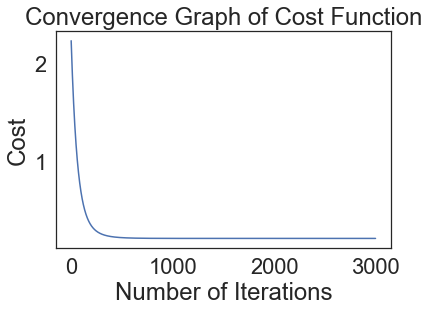

In [60]:
plt.plot(cost2)
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")

In [146]:
cost2[900]

array([0.20797308])

In [62]:
print(theta2)

[[ 3.80794249e-01]
 [ 3.54262208e-01]
 [ 1.11253249e-01]
 [-3.55726564e-01]
 [-3.49986994e-01]
 [ 2.71111607e-02]
 [ 2.84049066e-02]
 [ 3.21595006e-02]
 [-5.90843047e-03]
 [-1.64948815e-02]
 [-1.18093090e-02]
 [ 3.12920709e-05]
 [ 5.21480636e-02]
 [ 6.47320103e-02]
 [ 7.11208769e-01]]


In [63]:
#Linear Reg inbuilt func output
pred = sm.OLS(y_train, X_train)
pred1 = pred.fit()
print(pred1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.407
Model:                            OLS   Adj. R-squared (uncentered):              0.407
Method:                 Least Squares   F-statistic:                              8287.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):                        0.00
Time:                        11:52:25   Log-Likelihood:                     -1.9580e+05
No. Observations:              169120   AIC:                                  3.916e+05
Df Residuals:                  169106   BIC:                                  3.918e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [64]:
def pred(X_test, theta):
    predicted_val = X_test.dot(theta);
    return predicted_val;

In [65]:
ypred2_test=pred(X_test,theta2)
regression_results(y_test, ypred2_test)

explained_variance:  0.4088
r2:  0.4088
MAE:  0.4771
MSE:  0.5912
RMSE:  0.7689


In [66]:
ypred2_train=pred(X_train,theta2)
regression_results(y_train, ypred2_train)

explained_variance:  0.4069
r2:  0.4069
MAE:  0.4786
MSE:  0.5931
RMSE:  0.7701


In [67]:
X_train, X_test, y_train, y_test=train_test_split(x, run, train_size=0.70,test_size=0.30, random_state=100)

In [68]:
theta= theta_generate(X_train)

In [69]:
X_train=norm(X_train)
X_test=norm(X_test)
y_train=norm(y_train)
y_test=norm(y_test)

In [70]:
alpha = 0.1 
total = 3000
finalj3 = gradesc_fun(X_train, y_train, theta, alpha, total)

In [71]:
theta3=finalj3[0]
cost3=finalj3[1]

Text(0, 0.5, 'Cost')

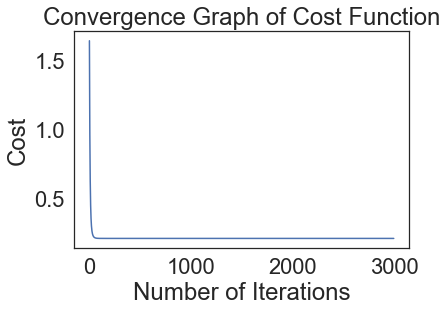

In [72]:
plt.plot(cost3)
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")

In [149]:
cost3[90]

array([0.20792112])

In [ ]:
def pred(X_test, theta):
    predicted_val = X_test.dot(theta);
    return predicted_val;

In [74]:
ypred3_test=pred(X_test,theta3)
regression_results(y_test, ypred3_test)

explained_variance:  0.4088
r2:  0.4088
MAE:  0.4771
MSE:  0.5912
RMSE:  0.7689


In [75]:
ypred3_train=pred(X_train,theta3)
regression_results(y_train, ypred3_train)

explained_variance:  0.4069
r2:  0.4069
MAE:  0.4786
MSE:  0.5931
RMSE:  0.7701


# Logistic

In [76]:
#Splitting the datset, into train and test
X_train_l, X_test_l, y_train_l, y_test_l=train_test_split(x, runlog1, train_size=0.70,test_size=0.30, random_state=100)

In [77]:
X_train_l=norm(X_train_l)
X_test_l=norm(X_test_l)

In [78]:
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 5000
learning_rate = 0.001

initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history_2, params_optimal_2) = gradient_descent(X_train_l, y_train_l, params, learning_rate, total)
y_pred_2 = predict(X_test_l, params_optimal_2)

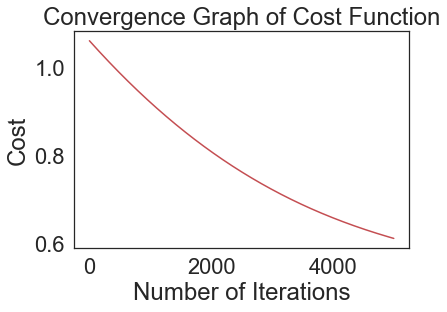

array([0.84986412])

In [79]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history_2)), cost_history_2, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
cost_history_2[1600]

In [80]:
cost_history_2[4999]

array([0.61082694])

In [81]:
confusion_matrix2 = confusion_matrix(y_test_l, y_pred_2)
print(confusion_matrix2)

[[25725 10481]
 [11582 24692]]


In [82]:
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 5000
learning_rate = 0.01

initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history_3, params_optimal_3) = gradient_descent(X_train_l, y_train_l, params, learning_rate, total)
y_pred = predict(X_test_l, params_optimal_3)

In [83]:
y_pred = predict(X_test_l, params_optimal_3)
print(params_optimal_3)
cost_history_3[4999]

[[ 1.25714354]
 [ 0.80604681]
 [ 0.14146213]
 [-0.85240014]
 [-0.72984158]
 [-0.04071873]
 [-0.06231687]
 [-0.01974083]
 [-0.05517793]
 [-0.12514929]
 [-0.31213916]
 [-0.02208663]
 [-0.39237478]
 [-0.07818056]
 [ 0.21442659]]


array([0.47871395])

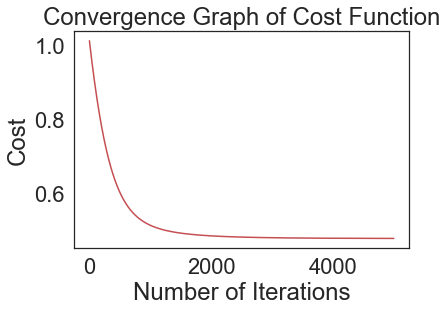

array([0.47871395])

In [84]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history_3)), cost_history_3, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
cost_history_3[4999]

In [85]:
cost_history_3[4000]

array([0.47916434])

In [86]:
confusion_matrix3 = confusion_matrix(y_test_l, y_pred)
print(confusion_matrix3)

[[29603  6603]
 [ 7067 29207]]


In [87]:
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 5000
learning_rate = 0.1

initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history_4, params_optimal_4) = gradient_descent(X_train_l, y_train_l, params, learning_rate, total)
y_pred4 = predict(X_test_l, params_optimal)

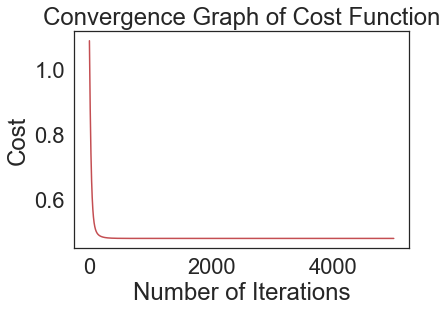

array([0.47847396])

In [88]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history_4)), cost_history_4, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
cost_history_4[4999]

In [89]:
params_optimal_4

array([[ 1.30888294],
       [ 0.84813609],
       [ 0.15339387],
       [-0.89500272],
       [-0.76849826],
       [-0.04635889],
       [-0.06933177],
       [-0.02034209],
       [-0.07772603],
       [-0.14914146],
       [-0.32257878],
       [-0.02305846],
       [-0.40539713],
       [-0.08102441],
       [ 0.91600905]])

In [90]:
confusion_matrix4 = confusion_matrix(y_test_l, y_pred4)
print(confusion_matrix4)

[[24477 11729]
 [12416 23858]]


# Experiment 3

In [91]:
#Function for converting the independent variables dataset into a datframe and doing manipulations
def self_data(dataset):
    xdata = pd.DataFrame(dataset)
    xdata.columns = ["MWG","NWG","KWG","MDIMC","NDIMC","MDIMA","NDIMB","KWI","VWM","VWN","STRM","STRN","SA","SB","constant"]
    return xdata

In [92]:
xdata=self_data(x)
#Dropping column STRN from the dataset
xmod = xdata.drop(columns=['NWG', 'MDIMC','MDIMA','KWI','VWN', 'SB'])
#Converting it into an array
xmod=np.array(xmod)
#Splitting the data
X_train, X_test, y_train, y_test=train_test_split(xmod, run, train_size=0.70,test_size=0.30, random_state=100)

In [93]:
#generating theta
theta_4=theta_generate(X_train)

In [94]:
#Normalising the data
X_train=norm(X_train)
X_test=norm(X_test)
y_train=norm(y_train)
y_test=norm(y_test)

In [95]:
alpha = .1 
total =3000
finalj4 = gradesc_fun(X_train, y_train, theta_4, alpha, total)
cost_4 = finalj4[1]
theta_4 = finalj4[0]

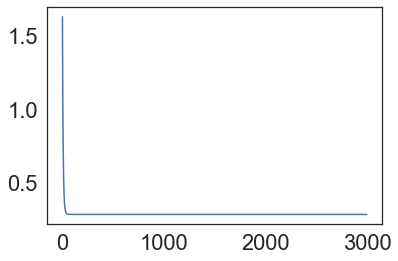

In [96]:
plt.plot(cost_4)

In [97]:
cost_4[-1]

array([0.28834489])

In [98]:
pred_4 = sm.OLS(y_train, X_train)
pred_4 = pred_4.fit()
print(pred_4.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.176
Model:                            OLS   Adj. R-squared (uncentered):              0.176
Method:                 Least Squares   F-statistic:                              4520.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):                        0.00
Time:                        12:11:37   Log-Likelihood:                     -2.2359e+05
No. Observations:              169120   AIC:                                  4.472e+05
Df Residuals:                  169112   BIC:                                  4.473e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [99]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred_4 = regressor.predict(X_test)
error = y_pred_4-y_test
math.sqrt(sum(error*error)/len(error))

0.9076049023688967

In [ ]:
def pred(X_test, theta):
    predicted_val = X_test.dot(theta);
    return predicted_val;

In [100]:
#Calculating all parameters
ypred_4=pred(X_test,theta_4)
regression_results(y_test, ypred_4)

explained_variance:  0.1763
r2:  0.1763
MAE:  0.5312
MSE:  0.8237
RMSE:  0.9076


In [101]:
#Calculating all parameters
ypred_train_4=pred(X_train,theta_4)
regression_results(y_train, ypred_train_4)

explained_variance:  0.1762
r2:  0.1762
MAE:  0.5299
MSE:  0.8238
RMSE:  0.9077


# Logistic

In [102]:
np.size(X_train,1)

9

[[ 0.92249096]
 [-0.00774745]
 [-0.37138114]
 [-0.03147677]
 [ 0.09417376]
 [-0.26061307]
 [-0.01943222]
 [-0.32760701]
 [ 0.1085324 ]]


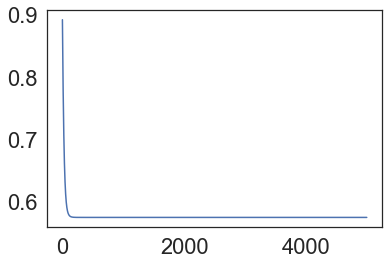

In [103]:
m = len(runs)
n = np.size(X_train,1)
params = np.random.rand(n,1) #betas
total = 5000
learning_rate = 0.1
initial_cost = compute_cost(X_train, y_train_l, params)
(cost_history_5, params_optimal_5) = gradient_descent(X_train, y_train_l, params, learning_rate, total)
y_pred_l_5 = predict(X_test, params_optimal_5)
print(params_optimal_5)
plt.plot(cost_history_5)

In [104]:
cost_history_5[4999]

array([0.57448209])

In [105]:
confusion_matrix5 = confusion_matrix(y_test_l, y_pred_l_5)
print(confusion_matrix5)

[[26452  9754]
 [11112 25162]]


# Experiment 4 

# Linear

In [106]:
rundata2 = rundata.drop(columns=["Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"])

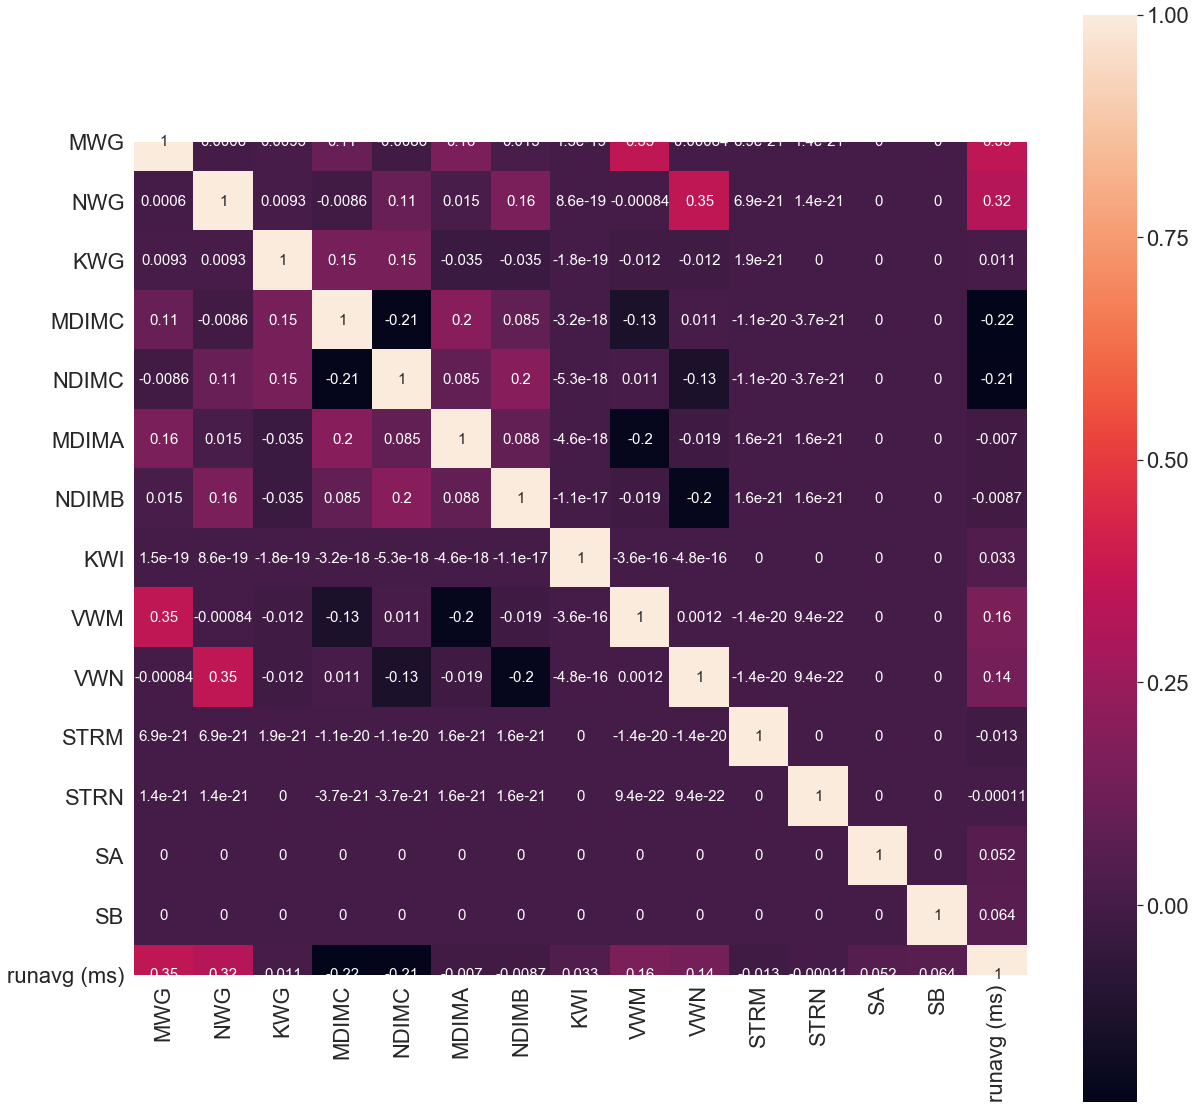

In [107]:
fig = plt.subplots(figsize = (20,20))
sns.set(font_scale=2.0)
sns.heatmap(rundata2.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 15})
plt.show()

In [108]:
xdata=self_data(x)
xmod2 = xdata.drop(columns=["MDIMA","NDIMB","KWG","KWI","STRM","STRN"])
#Converting it into an array
xmod2=np.array(xmod2)
#Splitting the data
X_train, X_test, y_train, y_test=train_test_split(xmod2, run, train_size=0.70,test_size=0.30, random_state=100)

In [109]:
#generating theta
theta_5=theta_generate(X_train)

In [110]:
X_train=norm(X_train)
X_test=norm(X_test)
y_train=norm(y_train)
y_test=norm(y_test)

In [111]:
alpha = .1 
total =3000
finalj5 = gradesc_fun(X_train, y_train, theta_5, alpha, total)
cost_5 = finalj5[1]
theta_5 = finalj5[0]

In [112]:
cost_5[-1]

array([0.21220852])

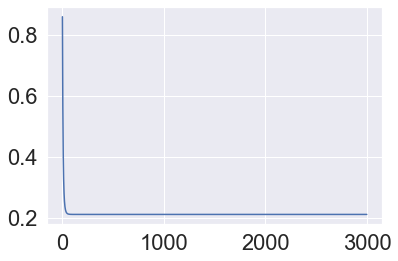

In [113]:
plt.plot(cost_5)

In [114]:
pred5 = sm.OLS(y_train, X_train)
pred5 = pred5.fit()
print(pred5.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.394
Model:                            OLS   Adj. R-squared (uncentered):              0.394
Method:                 Least Squares   F-statistic:                          1.373e+04
Date:                Thu, 13 Feb 2020   Prob (F-statistic):                        0.00
Time:                        12:20:29   Log-Likelihood:                     -1.9766e+05
No. Observations:              169120   AIC:                                  3.953e+05
Df Residuals:                  169112   BIC:                                  3.954e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\PRAKASH CHANDRA\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [ ]:
def pred(X_test, theta):
    predicted_val = X_test.dot(theta);
    return predicted_val;

In [115]:
ypred_5=pred(X_test,theta_5)
regression_results(y_test, ypred_5)

explained_variance:  0.396
r2:  0.396
MAE:  0.4741
MSE:  0.604
RMSE:  0.7772


In [116]:
ypred_train_5=pred(X_train,theta_5)
regression_results(y_train, ypred_train_5)

explained_variance:  0.3937
r2:  0.3937
MAE:  0.4762
MSE:  0.6063
RMSE:  0.7787


# Logistic

In [117]:
np.size(X_train,1)

9

In [118]:
m = len(runs)
n = np.size(X_train,1)
params = np.random.rand(n,1) #betas
total = 5000
learning_rate = 0.1
initial_cost = compute_cost(X_train, y_train_l, params)
(cost_history_6, params_optimal_6) = gradient_descent(X_train, y_train_l, params, learning_rate, total)
y_pred6 = predict(X_test, params_optimal_6)
print(params_optimal_6)

cost_history_6

[[ 1.2625524 ]
 [ 0.80834166]
 [-0.85775531]
 [-0.73601458]
 [-0.06044839]
 [-0.12443523]
 [-0.39523177]
 [-0.07920523]
 [ 0.3893656 ]]


array([[0.86467767],
       [0.85418376],
       [0.84397074],
       ...,
       [0.48915201],
       [0.48915201],
       [0.48915201]])

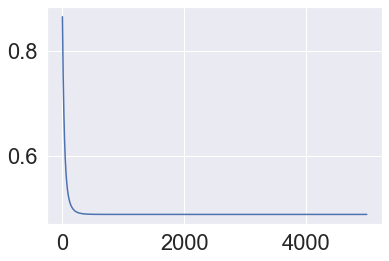

In [119]:
plt.plot(cost_history_6)

In [120]:
confusion_matrix6 = confusion_matrix(y_test_l, y_pred6)
confusion_matrix6


array([[29281,  6925],
       [ 6851, 29423]], dtype=int64)

# Experiment 2

In [121]:
def Cost_thresh(x,y,theta):
    m=len(rundata.axes[0])
    the1 = np.matmul(x,theta)
    Cost1=sum(np.subtract((the1),y)**2)
    Cost_thresh=Cost1/(2*m)
    return(Cost_thresh)   

In [122]:
def gradesc_thresh(x,y,theta,alpha,total):
    m=len(rundata.axes[0])
    xt = x.transpose()
    j=[0]*total
    for i in range(total):
            the2 =(np.matmul(x,theta))-y        
            the3=np.matmul(x.transpose(),the2)
            theta = theta - alpha*(1/m)*the3
            theta0=theta[-1]
            j[i] = Cost_thresh(x,y,theta)
            if (abs((j[i-1]-j[i]))<thresh):
                print(i,j[i])
                break
    finalj=(theta, j)
    return(finalj)


In [123]:
thresh = 0.001
theta_thresh=theta_generate(X_train)
#Finding cost and thetas
alpha = .1 
total=3000
finalj_thresh_1 = gradesc_thresh(X_train, y_train, theta_thresh, alpha, total)
cost_thresh_1 = finalj_thresh_1[1]
theta_thresh_1 = finalj_thresh_1[0]


39 [0.22231319]


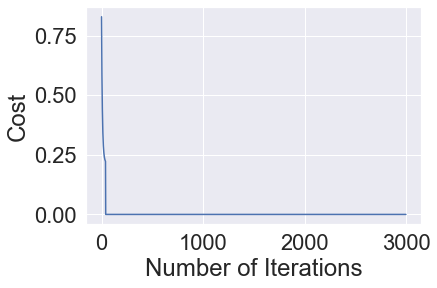

[array([0.82872864]),
 array([0.75416566]),
 array([0.68933799]),
 array([0.63289401]),
 array([0.58367906]),
 array([0.54070557]),
 array([0.50312794]),
 array([0.47022126]),
 array([0.44136335]),
 array([0.41601959]),
 array([0.39373006]),
 array([0.37409858]),
 array([0.35678351]),
 array([0.34148984]),
 array([0.32796257]),
 array([0.31598094]),
 array([0.30535366]),
 array([0.29591471]),
 array([0.28751986]),
 array([0.28004366]),
 array([0.2733768]),
 array([0.26742397]),
 array([0.26210194]),
 array([0.25733791]),
 array([0.25306817]),
 array([0.24923684]),
 array([0.24579489]),
 array([0.24269922]),
 array([0.23991189]),
 array([0.23739947]),
 array([0.23513247]),
 array([0.23308481]),
 array([0.23123346]),
 array([0.22955798]),
 array([0.22804026]),
 array([0.22666422]),
 array([0.22541555]),
 array([0.22428152]),
 array([0.22325078]),
 array([0.22231319]),
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [124]:
plt.plot(cost_thresh_1)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
cost_thresh_1

In [ ]:
def pred(X_test, theta):
    predicted_val = X_test.dot(theta);
    return predicted_val;

In [125]:
ypred_thresh_1=pred(X_test,theta_thresh_1)
regression_results(y_test, ypred_thresh_1)

explained_variance:  0.364
r2:  0.364
MAE:  0.4733
MSE:  0.636
RMSE:  0.7975


In [126]:
ypred_thresht_1=pred(X_train,theta_thresh_1)
regression_results(y_train, ypred_thresht_1)

explained_variance:  0.3648
r2:  0.3648
MAE:  0.4735
MSE:  0.6352
RMSE:  0.797


In [127]:
thresh = 0.01
theta_thresh2=theta_generate(X_train)
#Finding cost and thetas
alpha = .1 
total=3000
finalj_thresh_2 = gradesc_thresh(X_train, y_train, theta_thresh2, alpha, total)
cost_thresh_2 = finalj_thresh_2[1]
theta_thresh_2 = finalj_thresh_2[0]

13 [0.30235841]


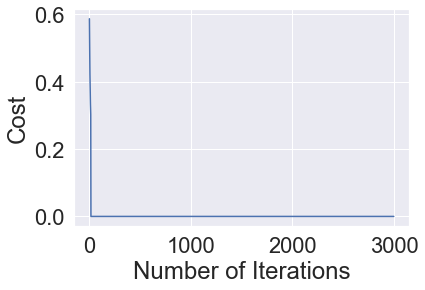

[array([0.58659037]),
 array([0.54503936]),
 array([0.50855348]),
 array([0.47645879]),
 array([0.44817799]),
 array([0.42321572]),
 array([0.40114614]),
 array([0.38160259]),
 array([0.36426875]),
 array([0.3488713]),
 array([0.33517363]),
 array([0.32297057]),
 array([0.31208386]),
 array([0.30235841]),
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [128]:
plt.plot(cost_thresh_2)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
cost_thresh_2

In [ ]:
def pred(X_test, theta):
    predicted_val = X_test.dot(theta);
    return predicted_val;

In [129]:
ypred_thresh_2=pred(X_test,theta_thresh_2)
regression_results(y_test, ypred_thresh_2)

explained_variance:  0.1393
r2:  0.1393
MAE:  0.6025
MSE:  0.8607
RMSE:  0.9278


# Logistic

In [132]:
def gradient_descent_thresh(X, y, params, alpha, total):
    m = len(y)
    cost_history = np.zeros((total,1))

    for i in range(total):
        params = params - (alpha/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)
        if (abs((cost_history[i-1]-cost_history[i]))<thresh):
                print(i,cost_history[i])
                break
    return (cost_history, params)

In [133]:
thresh = 0.001
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 5000
learning_rate = 0.1

initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history_thresh, params_optimal_thresh) = gradient_descent_thresh(X_train_l, y_train_l, params, learning_rate, total)
y_predl = predict(X_test_l, params_optimal_thresh)



104 [0.52459594]


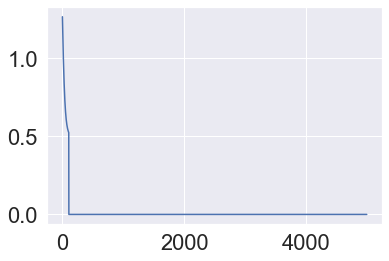

In [134]:
plt.plot(cost_history_thresh)

In [135]:
confusion_matrix10 = confusion_matrix(y_test_l, y_predl)
print(confusion_matrix10)

[[28277  7929]
 [ 8634 27640]]


In [136]:
thresh = 0.01
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 5000
learning_rate = 0.1

initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history_thresh_1, params_optimal_thresh_1) = gradient_descent_thresh(X_train_l, y_train_l, params, learning_rate, total)
y_pred2 = predict(X_test_l, params_optimal_thresh_1)


23 [0.82000633]


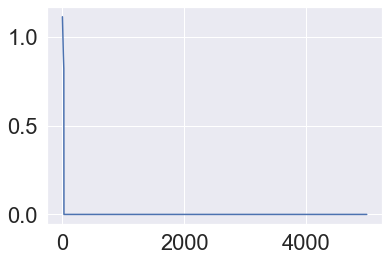

In [137]:
plt.plot(cost_history_thresh_1)

In [138]:
confusion_matrix11 = confusion_matrix(y_test_l, y_pred2)
print(confusion_matrix11)

[[22222 13984]
 [14436 21838]]


In [139]:
thresh = 0.1
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 5000
learning_rate = 0.1

initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history_thresh_2, params_optimal_thresh_2) = gradient_descent_thresh(X_train_l, y_train_l, params, learning_rate, total)
y_pred3 = predict(X_test_l, params_optimal_thresh_2)


1 [1.18903168]


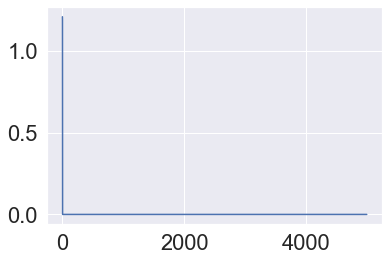

In [140]:
plt.plot(cost_history_thresh_2)

In [141]:
confusion_matrix12 = confusion_matrix(y_test_l, y_pred3)
print(confusion_matrix12)

[[18781 17425]
 [18250 18024]]
